In [ ]:
#pip install --upgrade numpy

In [ ]:
#pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
pd.set_option('display.max_column', 111)
pd.set_option('display.max_row', 111)
data2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/healthcare-dataset-stroke-data.csv')

In [ ]:
df2 = data2.copy()
df2.shape

(5110, 12)

In [ ]:
df2.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<Axes: >

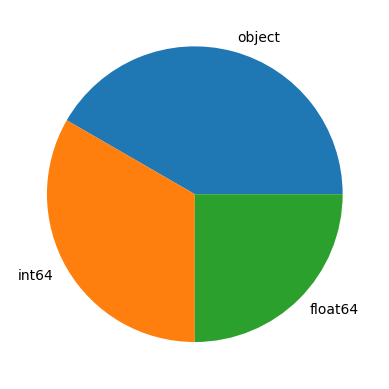

In [ ]:
df2.dtypes.value_counts().plot.pie()

In [ ]:
#le = LabelEncoder()

#label = le.fit_transform(df2['gender'])
#df2.drop("gender", axis=1, inplace=True)
#df2["gender"] = label

#label = le.fit_transform(df2['ever_married'])
#df2.drop("ever_married", axis=1, inplace=True)
#df2["ever_married"] = label

#label = le.fit_transform(df2['work_type'])
#df2.drop("work_type", axis=1, inplace=True)
#df2["work_type"] = label

#label = le.fit_transform(df2['Residence_type'])
#df2.drop("Residence_type", axis=1, inplace=True)
#df2["Residence_type"] = label

#label = le.fit_transform(df2['smoking_status'])
#df2.drop("smoking_status", axis=1, inplace=True)
#df2["smoking_status"] = label

In [ ]:
#df2 = df2.reindex(columns = [col for col in df2.columns if col != 'stroke'] + ['stroke'])

<Axes: >

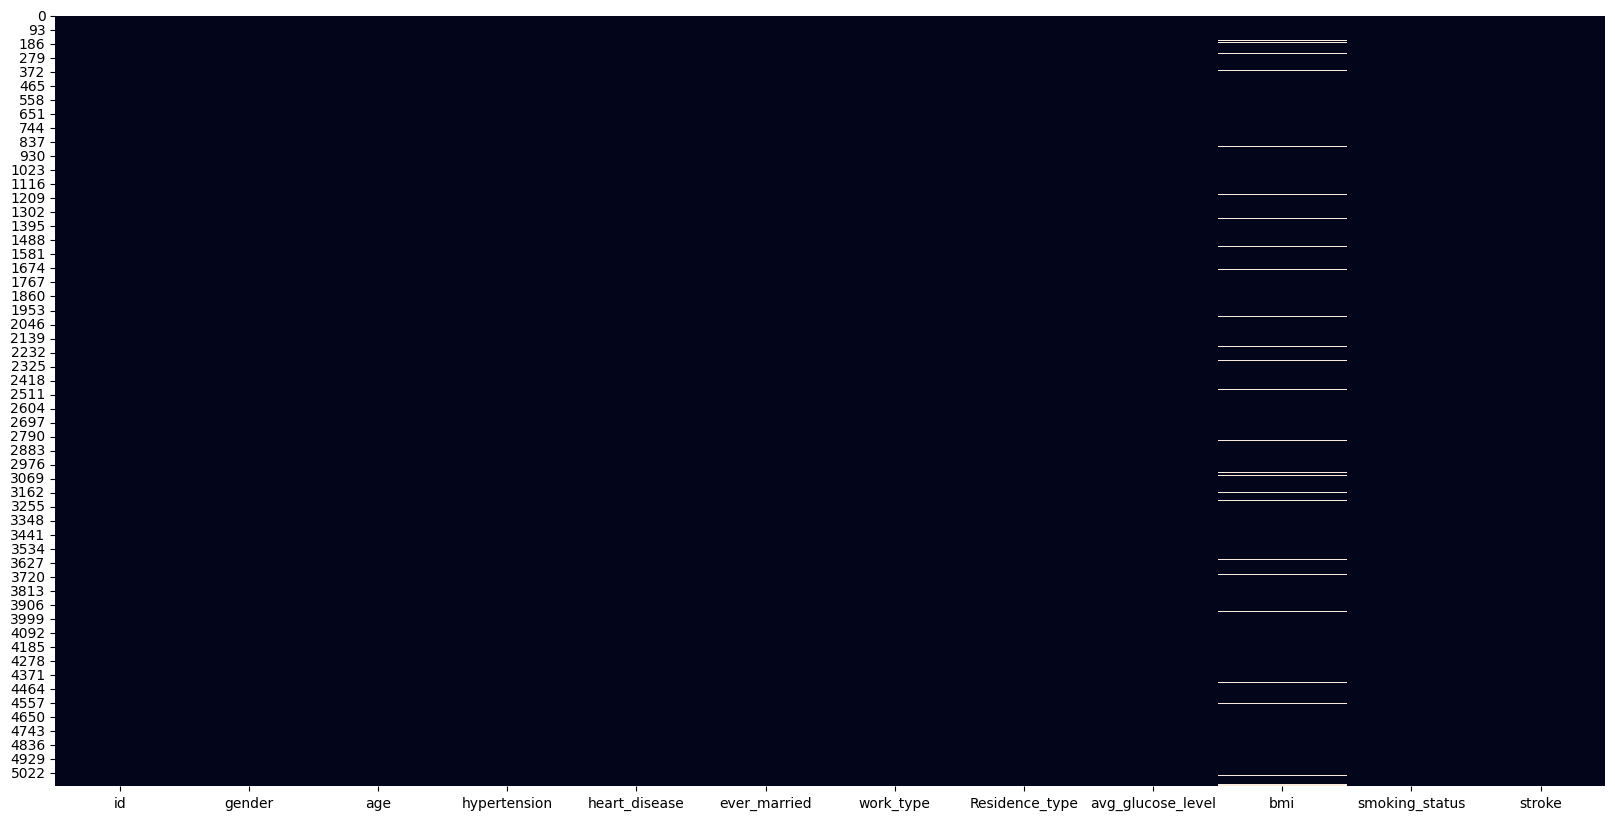

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.isna(), cbar = False)

In [ ]:
df2 = df2.dropna(axis = 0)

<Axes: >

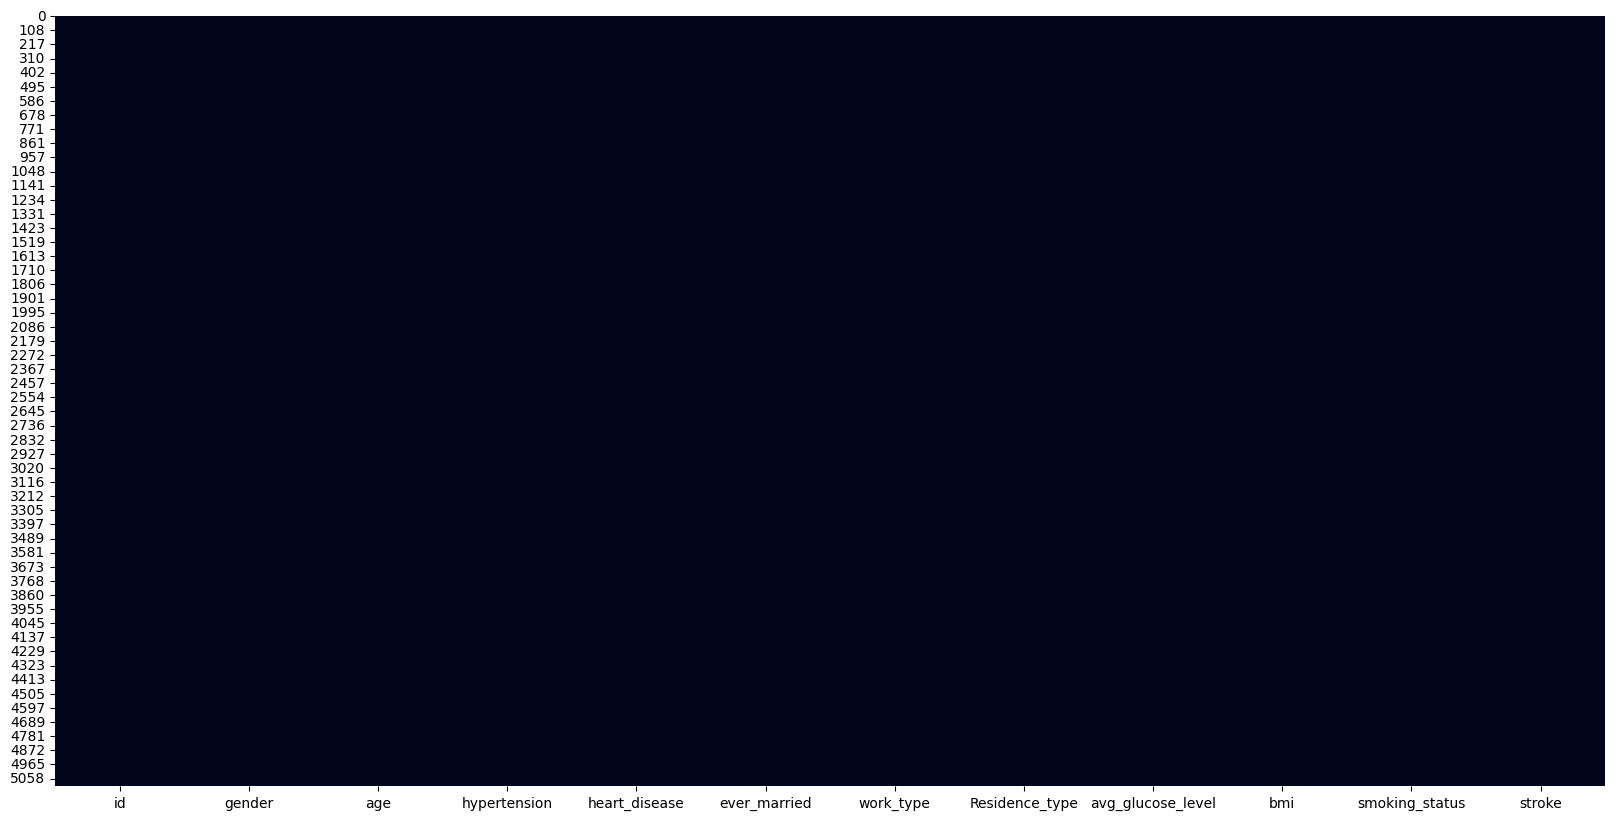

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.isna(), cbar = False)

In [ ]:
try:
    from google.colab import drive
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# HIDE OUTPUT
#CMD = "wget https://raw.githubusercontent.com/Diyago/"\
#  "GAN-for-tabular-data/master/requirements.txt"

#!{CMD}
#!pip install -r requirements.txt
#!pip install tabgan
#!pip install tabgan

In [ ]:
COLS_USED = ['gender',	'age',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'avg_glucose_level',	'bmi',	'smoking_status',	'stroke']
COLS_TRAIN = ['gender',	'age',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'avg_glucose_level',	'bmi',	'smoking_status', 'stroke']

In [ ]:
df2 = df2[COLS_USED]

In [ ]:
df2.shape

(4909, 11)

In [ ]:
df2.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop("stroke", axis=1),
                                                   df2["stroke"],
                                                   test_size = 0.2,
                                                   random_state = 42
)

X_test, Y_test = X_test.reset_index(drop=True), \
  Y_test.reset_index(drop=True)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

x_train = X_train.values
x_test = X_test.values
y_train = Y_train.values
y_test = Y_test.values

In [ ]:
print(X_train.shape, X_test.shape, Y_test.shape, Y_train.shape, end ="")

(3927, 10) (982, 10) (982, 1) (3927, 1)

In [ ]:
model = Sequential()
# Hidden 1
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(12, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)

ValueError: ignored

In [ ]:
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

ValueError: ignored

In [ ]:
y_test_var = np.var(y_test)
y_test_var

0.0569850758843601

In [ ]:
mse = 0.238

In [ ]:
if mse < y_test_var:
    print("The model has lower MSE than the variance of the target variable.")
else:
    print("The model has similar or higher MSE than the variance of the target variable.")

The model has similar or higher MSE than the variance of the target variable.


In [ ]:
(X_train.isna().sum()/X_train.shape[0]).sort_values(ascending = True)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
dtype: float64

In [ ]:
(Y_train.isna().sum()/Y_train.shape[0]).sort_values(ascending = True)

stroke    0.0
dtype: float64

In [ ]:
(X_test.isna().sum()/X_test.shape[0]).sort_values(ascending = True)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
dtype: float64

In [ ]:
#pip install --upgrade tabgan
#!pip install scikit-learn

In [ ]:
import sklearn

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3565,Female,40.0,0,0,Yes,Private,Urban,65.77,31.2,never smoked
898,Female,59.0,0,0,Yes,Self-employed,Urban,81.64,32.8,Unknown
2707,Female,57.0,0,0,Yes,Private,Urban,217.40,36.6,never smoked
4198,Male,81.0,0,0,Yes,Self-employed,Urban,71.18,23.9,formerly smoked
2746,Male,65.0,0,0,Yes,Self-employed,Urban,95.88,28.5,never smoked


In [ ]:
#from tabgan.sampler import OriginalGenerator, GANGenerator, ForestDiffusionGenerator
#import pandas as pd
#import numpy as np

#def fit_predict(clf, X_train, y_train, X_test, y_test):
#    clf.fit(X_train, y_train)
#    return sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])




#clf = sklearn.ensemble.RandomForestClassifier(n_estimators=25, max_depth=6)
#print("initial metric", fit_predict(clf, X_train, y_train, X_test, y_test))

#new_train1, new_target1 = OriginalGenerator().generate_data_pipe(X_train, Y_train, X_test, )
#print("OriginalGenerator metric", fit_predict(clf, new_train1, new_target1, X_test, Y_test))

#new_train1, new_target1 = GANGenerator().generate_data_pipe(X_train, Y_train, X_test, )
#print("GANGenerator metric", fit_predict(clf, new_train1, new_target1, X_test, Y_test))

In [ ]:
import pandas as pd
import numpy as np
from tabgan.utils import get_year_mnth_dt_from_date,make_two_digit,collect_dates
from tabgan.sampler import OriginalGenerator, GANGenerator


gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=['gender','ever_married',	'work_type', 'Residence_type','smoking_status'], bot_filter_quantile=0.001,
                                     top_filter_quantile=0.999,
                                     is_post_process=True, pregeneration_frac=2, only_generated_data=False).\
                                     generate_data_pipe(X_train, Y_train,\
                                     Y_test, deep_copy=True, only_adversarial=False, \
                                     use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/11 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

KeyError: ignored

In [ ]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=['gender','hypertension', 'heart_disease','ever_married',	'work_type',	'Residence_type','smoking_status'],
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100,
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 500, "patience": 25, \
          "epochs" : 500,}).generate_data_pipe(X_train, Y_train,\
          Y_test, deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

TypeError: ignored

In [ ]:
gen_x

In [ ]:
target_stroke_y

In [ ]:
final_GAN_DATA_STROKE = horizontal_concat = pd.concat([feature_stroke_x, target_stroke_y], axis=1)

In [ ]:
final_GAN_DATA_STROKE

In [ ]:
pred = model.predict(feature_stroke_x)
score = np.sqrt(metrics.mean_squared_error(pred,target_stroke_y))
print("Final score (RMSE): {}".format(score))

In [ ]:
final_GAN_DATA_STROKE['stroke'].value_counts(normalize = True)

In [ ]:
final_GAN_DATA_STROKE.to_csv('/content/drive/MyDrive/Colab Notebooks/data/GAN_Stroke_Datanew.csv', index = False)

In [ ]:
import matplotlib.pyplot as plt

# Example data
medications = ['Medication A', 'Medication B', 'Medication C', 'Medication D']
frequency = [20, 40, 10, 30]

# Create bar chart
fig, ax = plt.subplots()
ax.bar(medications, frequency)

# Customize chart
ax.set_title('Frequency of Medication Recommendations for Stroke Patients')
ax.set_xlabel('Medication')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', labelrotation=45)

plt.show()